In [1]:
import h5py as h5
import numpy as np
import os
import matplotlib.pyplot as plt

# we will use astropy for some useful constants and units 
from astropy import units as u
from astropy import constants as const
from matplotlib.ticker import (FormatStrFormatter,
                               AutoMinorLocator)
from IPython.display import Image # to open images in Ipython 


In [2]:
# path = '../COMPAS_runs/bh_200_ns_400_combined.h5'
path = os.environ['WORK']+'/supernova_remnant_bse/bh_200_ns_500_sigma_0.3_combined.h5'

In [3]:
fdata = h5.File(path, 'r')
list(fdata.keys())

['BSE_Common_Envelopes',
 'BSE_Double_Compact_Objects',
 'BSE_RLOF',
 'BSE_Supernovae',
 'BSE_System_Parameters',
 'Run_Details']

In [4]:
# print(list(fdata['Run_Details'].keys()))

# print()

print(list(fdata['BSE_Supernovae'].keys()))

print()

print(list(fdata['BSE_System_Parameters'].keys()))

['Applied_Kick_Magnitude(SN)', 'ComponentSpeed(CP)', 'ComponentSpeed(SN)', 'Drawn_Kick_Magnitude(SN)', 'Eccentricity', 'Eccentricity<SN', 'Experienced_RLOF(SN)', 'Fallback_Fraction(SN)', 'Is_Hydrogen_Poor(SN)', 'Kick_Magnitude(uK)', 'MT_Donor_Hist(SN)', 'Mass(CP)', 'Mass(SN)', 'Mass_CO_Core@CO(SN)', 'Mass_Core@CO(SN)', 'Mass_He_Core@CO(SN)', 'Mass_Total@CO(SN)', 'Orb_Velocity<SN', 'SEED', 'SN_Kick_Mean_Anomaly(SN)', 'SN_Kick_Phi(SN)', 'SN_Kick_Theta(SN)', 'SN_Type(SN)', 'SemiMajorAxis', 'SemiMajorAxis<SN', 'Stellar_Type(CP)', 'Stellar_Type(SN)', 'Stellar_Type_Prev(SN)', 'Supernova_State', 'SystemicSpeed', 'Time', 'Unbound']

['CE_Alpha', 'CH_on_MS(1)', 'CH_on_MS(2)', 'Eccentricity@ZAMS', 'Equilibrated_At_Birth', 'Error', 'LBV_Factor', 'Mass@ZAMS(1)', 'Mass@ZAMS(2)', 'Merger', 'Merger_At_Birth', 'Metallicity@ZAMS(1)', 'Metallicity@ZAMS(2)', 'Omega@ZAMS(1)', 'Omega@ZAMS(2)', 'SEED', 'SN_Kick_Magnitude_Random_Number(1)', 'SN_Kick_Magnitude_Random_Number(2)', 'SemiMajorAxis@ZAMS', 'Sigma_K

In [5]:
# all groups contain the parameter "SEED", so we can use this to print the lengths
for group in ['BSE_Supernovae', 'BSE_System_Parameters']:
    print('Group %s has %s number of rows'%(group, fdata[group]["SEED"].len()))

Group BSE_Supernovae has 550219 number of rows
Group BSE_System_Parameters has 1000000 number of rows


In [6]:
# this is just a little function that we will use to make the plot more beautiful (bigger ticks, labels)
# However, you do not have to use this (just uncommoment "layoutAxes" everywhere)

def layoutAxes(ax, nameX='', nameY='', \
               labelSizeMajor = 10, fontsize = 18, second=False, labelpad=None, setMinor=True):
    """
    Tiny code to do the layout for axes in matplotlib
    """
    tickLengthMajor = 10
    tickLengthMinor = 5
    tickWidthMajor  = 1.5
    tickWidthMinor  = 1.5
    
    #rc('axes', linewidth=2)
    #label1 always refers to first axis not the twin 
    if not second:
        for tick in ax.xaxis.get_major_ticks():
            tick.label1.set_fontsize(fontsize)
            #tick.label1.set_fontweight('bold')
        for tick in ax.yaxis.get_major_ticks():
            tick.label1.set_fontsize(fontsize)
            #tick.label1.set_fontweight('bold')
    if second:
        for tick in ax.xaxis.get_major_ticks():
            tick.label2.set_fontsize(fontsize)
            #tick.label1.set_fontweight('bold')
        for tick in ax.yaxis.get_major_ticks():
            tick.label2.set_fontsize(fontsize)
            #tick.label1.set_fontweight('bold')
    for axis in ['top','bottom','left','right']:
        ax.spines[axis].set_linewidth(1.2)
    ax.tick_params(length=tickLengthMajor, width=tickWidthMajor, which='major')
    ax.tick_params(length=tickLengthMinor, width=tickWidthMinor, which='minor')
    ax.set_xlabel(nameX, fontsize=fontsize,labelpad=labelpad)#,fontweight='bold')
    ax.set_ylabel(nameY, fontsize=fontsize,labelpad=labelpad)#, fontweight='bold')    
    
    if setMinor==True:
        # add minor ticks:
        ax.xaxis.set_minor_locator(AutoMinorLocator())
        ax.yaxis.set_minor_locator(AutoMinorLocator())

    return ax


# Identify the Supernova events System Parameters

In [7]:
seedSN = fdata['BSE_Supernovae']["SEED"][...].squeeze()
seedSystem = fdata['BSE_System_Parameters']["SEED"][...].squeeze()

In [8]:
np.where(seedSystem==seedSN[0]) # looks like the SEED values are not unique!!!

(array([     1,  25005,  50002,  75002, 100003, 125001, 150001, 175001,
        200003, 225002, 250001, 275001, 300002, 325001, 350002, 375002,
        400003, 425004, 450002, 475002, 500001, 525003, 550001, 575001,
        600001, 625001, 650001, 675003, 700001, 725001, 750001, 775001,
        800002, 825001, 850001, 875001, 900002, 925001, 950001, 975001]),)

In [9]:
np.where(seedSN==seedSN[0]) # looks like the SEED values are not unique!!!

(array([     0,  13758,  27514,  41270,  55026,  68781,  82536,  96291,
        110047, 123803, 137558, 151313, 165069, 178824, 192580, 206336,
        220092, 233848, 247604, 261360, 275115, 288871, 302626, 316381,
        330136, 343891, 357646, 371402, 385157, 398912, 412667, 426422,
        440178, 453933, 467688, 481443, 495199, 508954, 522709, 536464]),)

In [10]:
# maskSN = np.isin(seedSystem, seedSN, assume_unique=False) # True for each SEED in System that is also in Supernovae

In [11]:
# print(len(maskSN))
# print(np.sum(maskSN))

# Plot ZAMS mass vs Remant Mass

## Supernovae

In [12]:
SN_MASS_CORE = fdata['BSE_Supernovae']["Mass_Core@CO(SN)"][...].squeeze()
SN_MASS_CO = fdata['BSE_Supernovae']["Mass_CO_Core@CO(SN)"][...].squeeze()

SN_MASS_REM = fdata['BSE_Supernovae']["Mass(SN)"][...].squeeze()
SN_STELLAR_TYPE = fdata['BSE_Supernovae']["Stellar_Type(SN)"][...].squeeze()
SN_TYPE = fdata['BSE_Supernovae']["SN_Type(SN)"][...].squeeze() 

SN_STELLAR_TYPE_PREV = fdata['BSE_Supernovae']["Stellar_Type_Prev(SN)"][...].squeeze()


UNBOUND  = fdata['BSE_Supernovae']["Unbound"][...].squeeze() 

CP_STELLAR_TYPE =fdata['BSE_Supernovae']["Stellar_Type(CP)"][...].squeeze()

In [13]:
maskSN_NS = ((SN_STELLAR_TYPE ==13) * (SN_TYPE == 1)) # select NSs, ignore electron capture SN
maskSN_BH = ((SN_STELLAR_TYPE ==14) * (SN_TYPE == 1)) # select BHs, ignore electron capture SN

maskCP_NS = (CP_STELLAR_TYPE == 13)
maskCP_BH = (CP_STELLAR_TYPE == 14)
maskCP_other = (CP_STELLAR_TYPE != 13) * (CP_STELLAR_TYPE != 14)

In [14]:
print(sum(maskCP_NS) + sum(maskCP_BH) + sum(maskCP_other))
print(len(CP_STELLAR_TYPE))

550219
550219


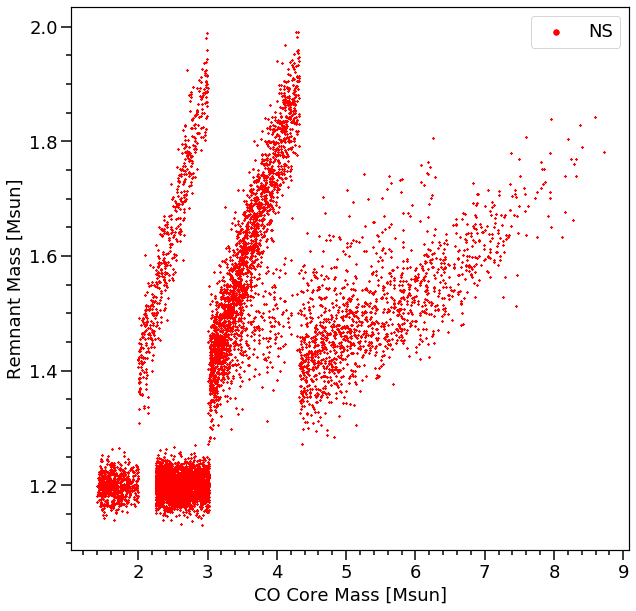

In [15]:
f, ax= plt.subplots(1, 1,  figsize=(10,10)) 

s=0.2
plt.scatter(SN_MASS_CORE[maskSN_NS], SN_MASS_REM[maskSN_NS], s=s, color='r', label='NS')

# plt.scatter(SN_MASS_CORE[maskSN_BH], SN_MASS_REM[maskSN_BH], s=s, color='b', label='BH')

layoutAxes(ax=ax, nameX='CO Core Mass [Msun]',\
           nameY='Remnant Mass [Msun]')

lgnd = plt.legend(scatterpoints=1, fontsize=18)
lgnd.legendHandles[0]._sizes = [30]
# lgnd.legendHandles[1]._sizes = [30]

# plt.xticks(np.arange(min(SN_MASS_CORE[maskSN_NS]), max(SN_MASS_CORE[maskSN_NS])+1, 1.0))

plt.show()


# Investigate the double structure

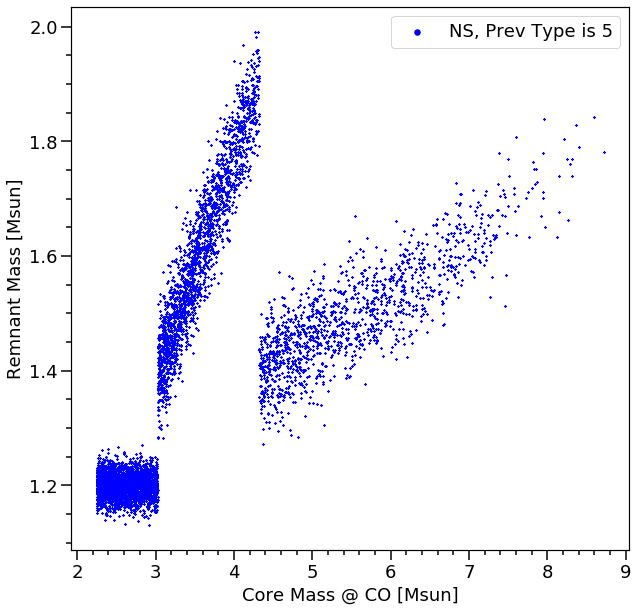

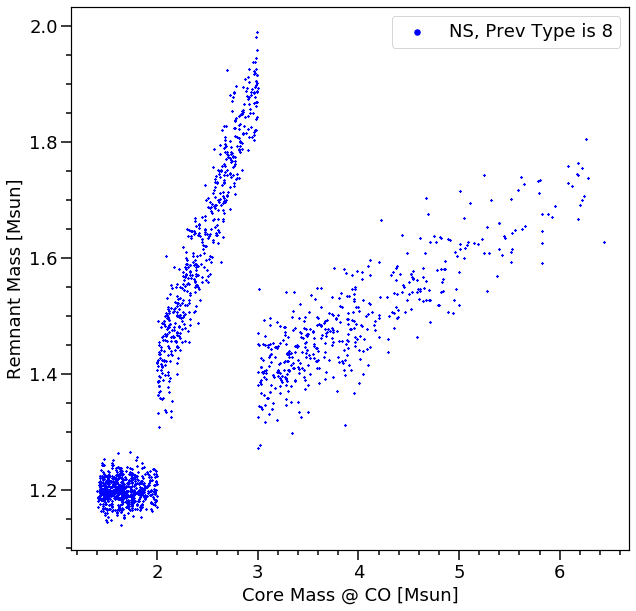

In [16]:
for i in [5,8]:
    maskPrev = (SN_STELLAR_TYPE_PREV == i)
    f, ax= plt.subplots(1, 1,  figsize=(10,10)) 
    s=0.2
    plt.scatter(SN_MASS_CORE[maskSN_NS*maskPrev], SN_MASS_REM[maskSN_NS*maskPrev], s=s, color='b', label=f'NS, Prev Type is {i}')

    layoutAxes(ax=ax, nameX='Core Mass @ CO [Msun]',\
               nameY='Remnant Mass [Msun]')

    lgnd = plt.legend(scatterpoints=1, fontsize=18)
    lgnd.legendHandles[0]._sizes = [30]

    plt.show()


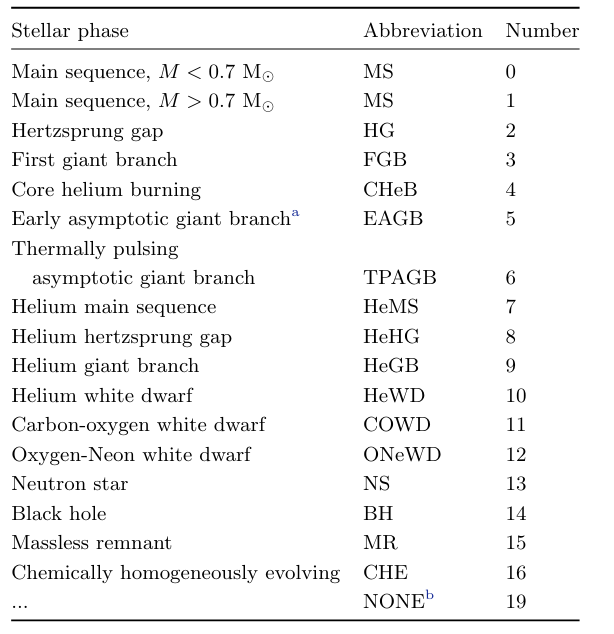

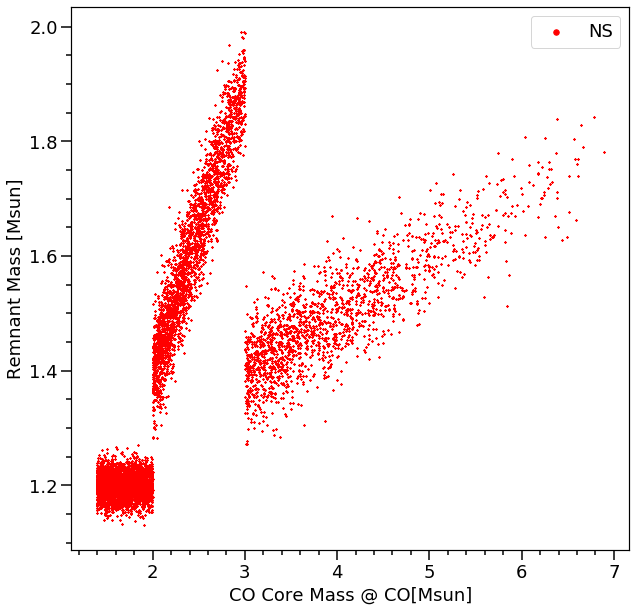

In [17]:
f, ax= plt.subplots(1, 1,  figsize=(10,10)) 

s=0.2

plt.scatter(SN_MASS_CO[maskSN_NS], SN_MASS_REM[maskSN_NS], s=s, color='r', label='NS')

layoutAxes(ax=ax, nameX='CO Core Mass @ CO[Msun]',\
           nameY='Remnant Mass [Msun]')

# plt.xlim(0, 10)
# plt.ylim(0, 12)
# plt.loglog()

lgnd = plt.legend(scatterpoints=1, fontsize=18)
lgnd.legendHandles[0]._sizes = [30]

plt.show()


# Plot NS Kick Dist

In [18]:
SN_KICK = fdata['BSE_Supernovae']["Applied_Kick_Magnitude(SN)"][...].squeeze()

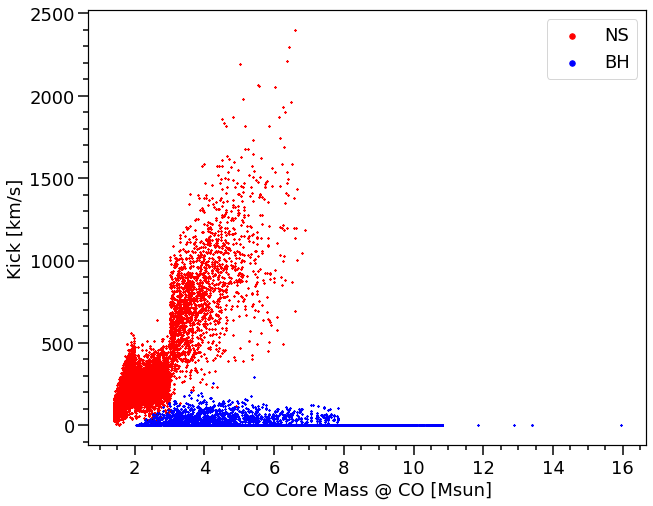

In [19]:
f, ax= plt.subplots(1, 1,  figsize=(10,8)) 

s=0.2
plt.scatter(SN_MASS_CO[maskSN_NS], SN_KICK[maskSN_NS], s=s, color='r', label='NS')
plt.scatter(SN_MASS_CO[maskSN_BH], SN_KICK[maskSN_BH], s=s, color='b', label='BH')

layoutAxes(ax=ax, nameX='CO Core Mass @ CO [Msun]',\
           nameY='Kick [km/s]')

lgnd = plt.legend(scatterpoints=1, fontsize=18)
lgnd.legendHandles[0]._sizes = [30]
lgnd.legendHandles[1]._sizes = [30]

plt.show()

# Plots from Mandel Muller 2020

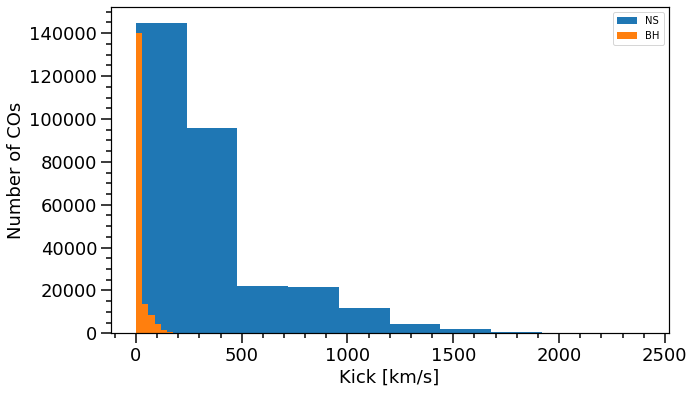

In [20]:
f, ax= plt.subplots(1, 1,  figsize=(10,6)) 
plt.hist(SN_KICK[maskSN_NS], label='NS')
plt.hist(SN_KICK[maskSN_BH], label='BH')

layoutAxes(ax=ax, nameX='Kick [km/s]',\
           nameY='Number of COs')
plt.legend()
plt.show()

In [21]:
from scipy.stats.kde import gaussian_kde
from numpy import linspace

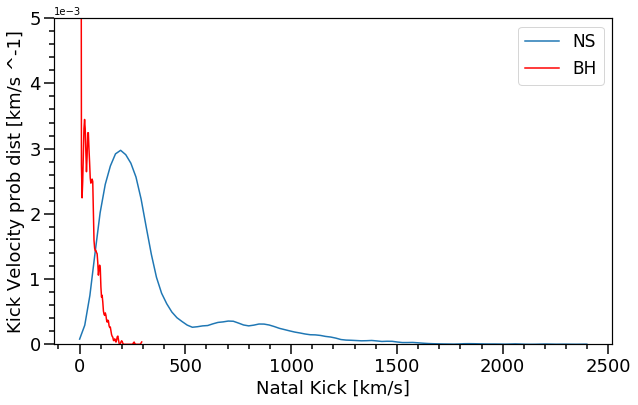

In [22]:
f, ax= plt.subplots(1, 1,  figsize=(10,6)) 

NS_data = SN_KICK[maskSN_NS] 
BH_data = SN_KICK[maskSN_BH] 

# this create the kernel, given an array it will estimate the probability over that values
kde_NS = gaussian_kde( NS_data )
kde_BH = gaussian_kde( BH_data )

# these are the values over wich your kernel will be evaluated
NS_dist_space = linspace( min(NS_data), max(NS_data), 100 )
BH_dist_space = linspace( min(BH_data), max(BH_data), 100 )

# plot the results
plt.plot( NS_dist_space, kde_NS(NS_dist_space), c='C0', label='NS')
plt.plot( BH_dist_space, kde_BH(BH_dist_space), c='r' , label='BH')

layoutAxes(ax=ax, nameX='Natal Kick [km/s]',\
           nameY='Kick Velocity prob dist [km/s ^-1]')


plt.ticklabel_format(axis='y', style='sci',scilimits=(0,0))

plt.ylim(0, 5e-3)

plt.legend(fontsize=17)

plt.show()